                CORONAVIRUS (COVID-19) EXPLORATORY DATA ANALYSIS AND VISUALIZATION

The Severe acute respiratory syndrome coronavirus-2 (SARS-CoV-2) is responsible for the current coronavirus disease 2019 (COVID-19) pandemic. COVID-19 has now infected more than 2 million individuals and killed 120 thousand people around the
world. The rapid transmission of SARS-CoV-2 continues and there is no drug or vaccineagainst the disease yet. While scientists are working to find the right solution, it is important to curtail the spread of this virus.
We take the initiative to go through an EDA on the diesase and provide explanations to some insights we gain from the EDA.

Lets get started 


Importing relevant python packages and libraries

In [95]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
import operator 

Loading data from JHU github repository

In [4]:
# Get the latest data
!git clone https://github.com/CSSEGISandData/COVID-19


fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [103]:
# Retriving Dataset
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [123]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939
Albania,0,0,0,0,0,0,0,0,0,0,...,584,609,634,663,678,712,726,736,750,766
Algeria,0,0,0,0,0,0,0,0,0,0,...,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,717,723,723,731,738,738,743,743,743
Angola,0,0,0,0,0,0,0,0,0,0,...,24,24,25,25,25,25,26,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
France,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
South Sudan,0,0,0,0,0,0,0,0,0,0,...,4,4,4,5,5,5,6,6,34,34
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


Preprocessing of the data

We are trying to put the data in a more useable format for our analysis. ie Havu=ing all dates and vaues in single columns

In [105]:
#minor preprocesing
confirmed=confirmed.drop(['Province/State','Lat', 'Long'],axis=1)
deaths=deaths.drop(['Province/State','Lat', 'Long'],axis=1)
recoveries=recoveries.drop(['Province/State','Lat', 'Long'],axis=1)

#Set the index to country
confirmed=confirmed.set_index('Country/Region')
deaths=deaths.set_index('Country/Region')
recoveries=recoveries.set_index('Country/Region')

#Stack the data Frames
cases=confirmed.stack()
death=deaths.stack()
recovery=recoveries.stack()

#Reseting the index to have a good data frame with all information
cases=cases.reset_index()
cases.columns=['Country','Date','Cases']

death=death.reset_index()
death.columns=['Country','Date','Deaths']

recovery=recovery.reset_index()
recovery.columns=['Country','Date','Recoveries']




In [110]:
#merge the 3 data frames to form one master dataframe
one = pd.merge(cases, death,  how='left', on=['Country','Date'])
data = pd.merge(one, recovery,  how='left', on=['Country','Date'])

# get mortality and recovery rates per day
data['Mortality_rate']=data['Deaths']/data['Cases']
data['Recovery_rate']=data['Recoveries']/data['Cases']

Working on world stats to get a good overview

In [83]:
#picking off all dates
cols = confirmed.keys()

confirmed_dates = confirmed.loc[:, cols[4]:cols[-1]]
deaths_dates = deaths.loc[:, cols[4]:cols[-1]]
recoveries_dates = recoveries.loc[:, cols[4]:cols[-1]]

dates = confirmed_dates.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed_dates[i].sum()
    death_sum = deaths_dates[i].sum()
    recovered_sum = recoveries_dates[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# daily increases
world_daily_increase = daily_increase(world_cases)
death_daily_increase = daily_increase(total_deaths)
recovery_daily_increase = daily_increase(total_recovered)
active_daily_increase = daily_increase(total_active)


In [ ]:
Working on dates

In [84]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [ ]:
World over view on cases,deaths,recoveries

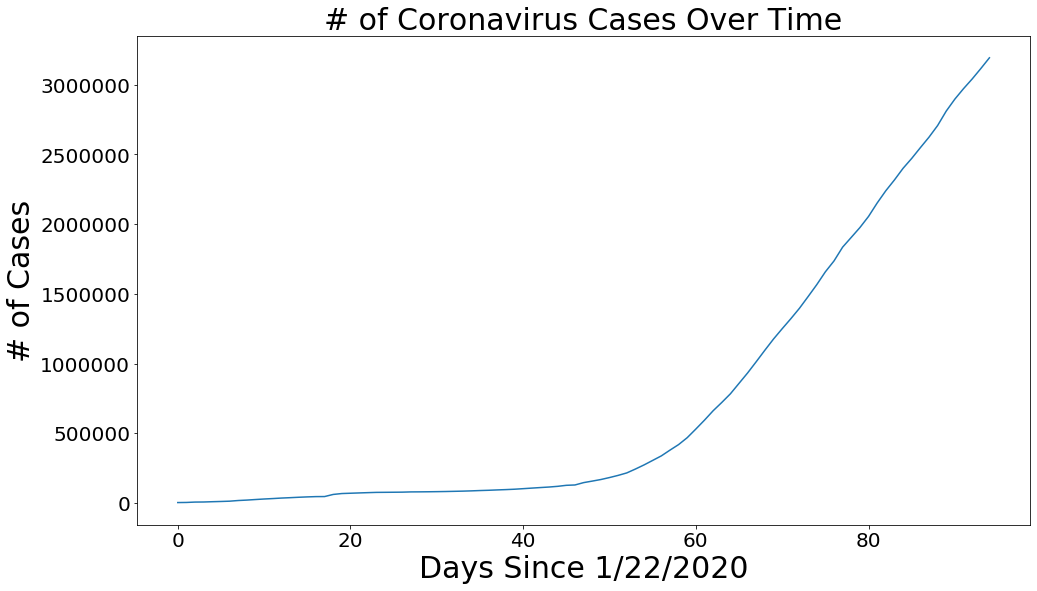

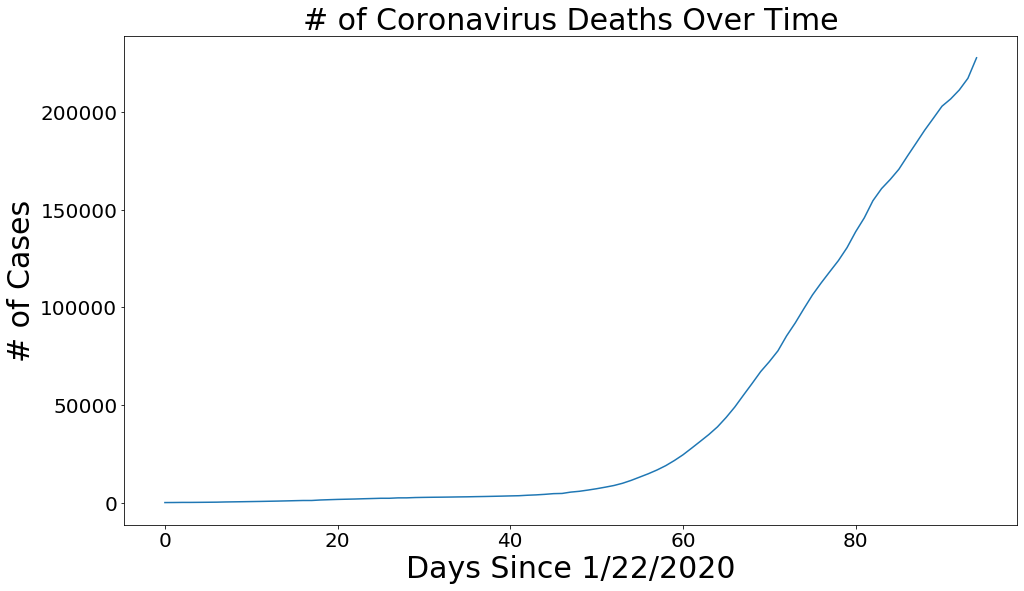

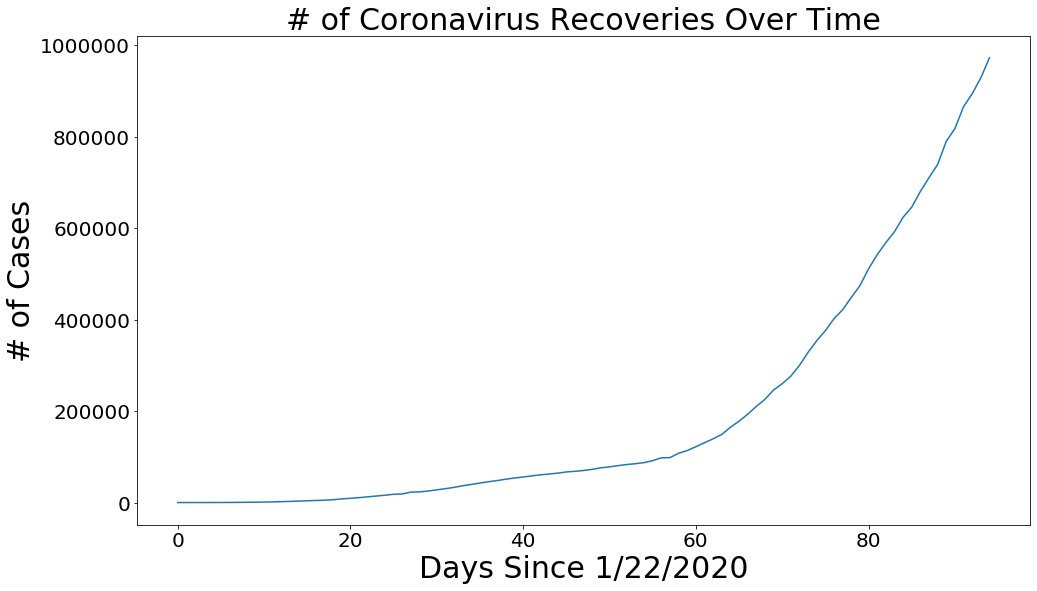

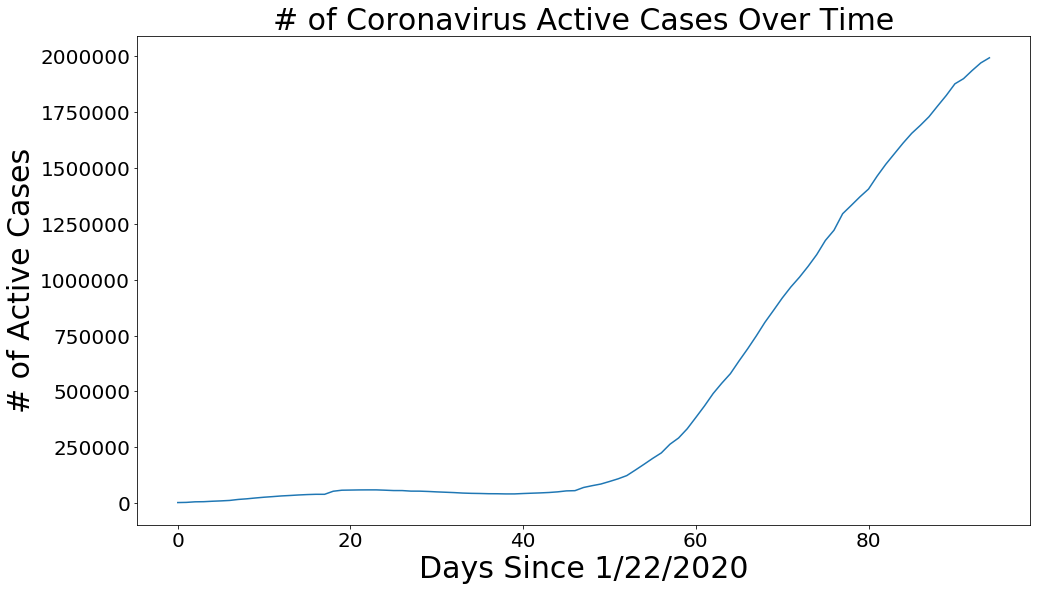

In [88]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('# of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Mortality Rate (worldwide)

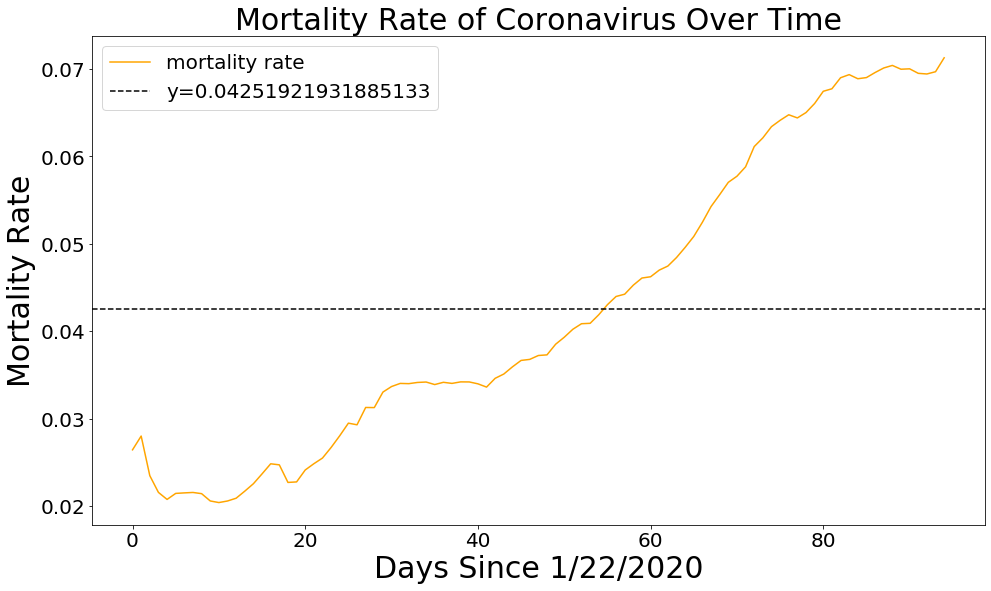

In [89]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Recovery Rate (worldwide)

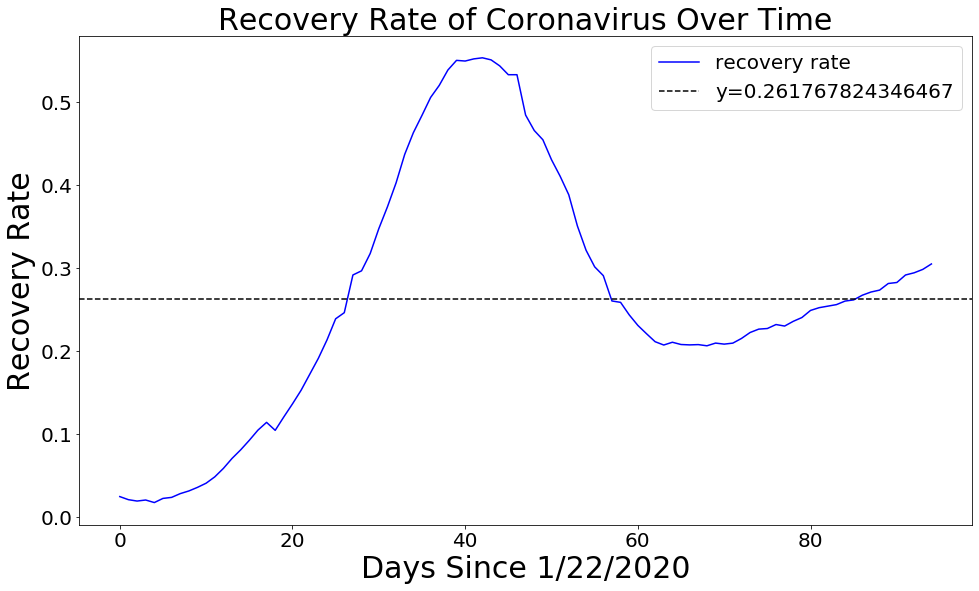

In [90]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Graphing deaths against recoveries

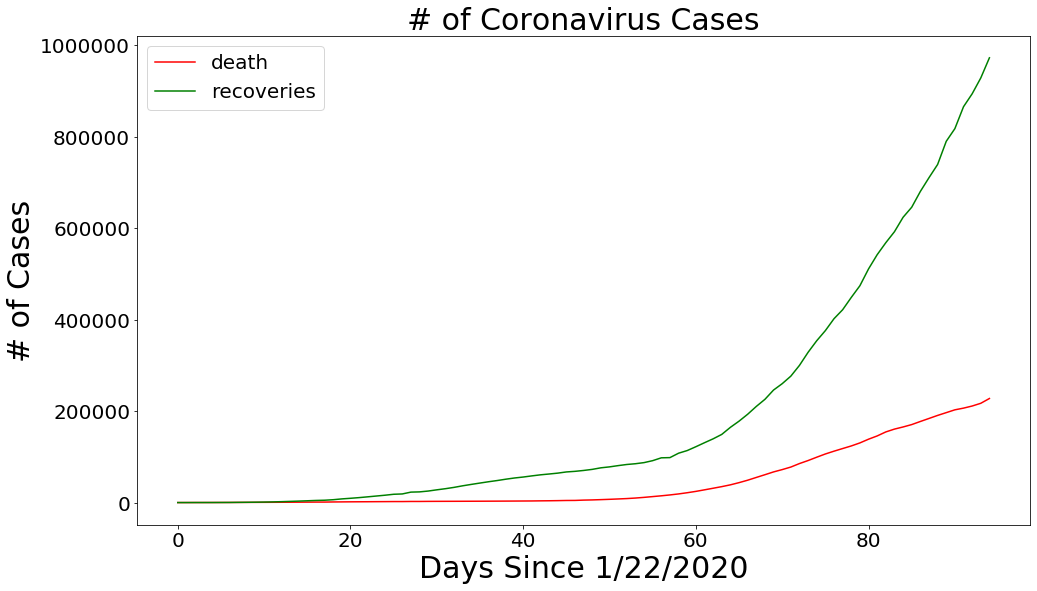

In [91]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Working on a per country view

In [92]:
unique_countries =  list(data['Country'].unique())

In [99]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 
country_recovery_rate = []

no_cases = []
for i in unique_countries:
    cases = data[data['Country']==i]['Cases'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = data[data['Country']==unique_countries[i]]['Cases'].sum()
    country_death_cases.append(data[data['Country']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(data[data['Country']==unique_countries[i]]['Recoveries'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])
    country_recovery_rate.append(country_recovery_cases[i]/country_confirmed_cases[i])

In [102]:
data[data['Country']=='China']


,Country,Date,Cases,Deaths,Recoveries,Mortality_rate,Recovery_rate
69993,China,1/22/20,1,0,0,0.000000,0.000000
69994,China,1/22/20,1,0,0,0.000000,0.000000
69995,China,1/22/20,1,0,0,0.000000,0.000000
69996,China,1/22/20,1,0,0,0.000000,0.000000
69997,China,1/22/20,1,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...
3627751,China,4/29/20,1268,1,183,0.000789,0.144322
3627752,China,4/29/20,1268,1,1,0.000789,0.000789
3627753,China,4/29/20,1268,1,73,0.000789,0.057571
3627754,China,4/29/20,1268,1,181,0.000789,0.142744


In [100]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,'Recovery Rate':country_recovery_rate,
                          'Mortality Rate': country_mortality_rate})

# number of cases per country/region
country_df.style.background_gradient(cmap='Greens')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Recovery Rate,Mortality Rate
0,China,7190647398,282537783,5053478364,1854631251,0.702785,0.039292
1,France,479845465,58589047,115547377,305709041,0.240801,0.122100
2,United Kingdom,367142435,46033603,1943502,319165330,0.005294,0.125383
3,Netherlands,22751550,2397150,187225,20167175,0.008229,0.105362
4,US,19536787,977901,1613848,16945038,0.082606,0.050054
5,Australia,13925632,122496,5647808,8155328,0.405569,0.008796
6,Canada,13915380,568245,62889525,-49542390,4.519426,0.040836
7,Italy,5934150,732733,1336289,3865128,0.225186,0.123477
8,Spain,5884956,578196,2142687,3164073,0.364096,0.098250
9,Germany,4368674,112523,2136071,2120080,0.488952,0.025757


We divie into the Analysis to try and answer three questions


Question 1
What caused the drop in recoveries world over from the start of March taking into account that the deaths kept rising

It is important to note that by End of Febraury China was reaching the top of their curve and it was just starting to flatten. And it without a doubt was responsible for majority of the recoveries in the world. The drop then meant that a new surge in cases was stemming up majorly from Europe and America and these caused the deep as shown below.

Question 2
Why are we noticing a higher mortality and growth rate for covid-19 amoung some regions compared to others
When we look at mortality rates by country We are noticing a slower mortlity in Africa, Australia among others. What is causing this could be the regions had a head start in preparation for the pandemic or the Airplane traffic to these places is low and thus benefited from not importing the case or the curve is yet to spike in those geographies. We provide some visualizations to try and understand the scenarios


Question 3
Do we expect to have another surge in corona virus cases just like we saw between March and April 2020
It goes without saying that all countries are starting their curves at relatively different times and could be bound to mean fast rising countries could be on their way up.
Where as the large numbers are from densely populated countries one wonders if Africa and Australia or South America will be the next hot area for the spread of the diseases. We look into this below.

References
https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction
